In [1]:
import pandas as pd

GOOG = '/kaggle/input/google-stock-market-data-2024/GOOG.csv'

df = pd.read_csv(filepath_or_buffer=GOOG, header=[0, 1], parse_dates=[('Price', 'Ticker')])
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,year
0,2024-01-02,139.218109,139.559998,140.615005,137.740005,139.600006,20071900,2024
1,2024-01-03,140.016144,140.360001,141.089996,138.429993,138.600006,18974300,2024
2,2024-01-04,137.701828,138.039993,140.634995,138.009995,139.850006,18253300,2024
3,2024-01-05,137.053421,137.389999,138.809998,136.850006,138.352005,15433200,2024
4,2024-01-08,140.185715,140.529999,140.639999,137.880005,138.000000,17645300,2024


How many years of data do we have?

In [2]:
df['year'].value_counts().to_frame().reset_index()

,year,count
0,2024,233


We have less than one trading year of quotes. It's hard to know what to expect from just one year of quotes.

We can tell by looking at the top row that we do not have any redundant price quotes, but let's look at the price correlations.

In [3]:
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,0.999944,0.994705,0.997199,0.990169,-0.301528
Close,0.999944,1.000000,0.994650,0.997206,0.990052,-0.300700
High,0.994705,0.994650,1.000000,0.995540,0.996587,-0.262401
Low,0.997199,0.997206,0.995540,1.000000,0.994350,-0.308561
Open,0.990169,0.990052,0.996587,0.994350,1.000000,-0.269599
Volume,-0.301528,-0.300700,-0.262401,-0.308561,-0.269599,1.000000


What do we see? We don't expect to see much in a table of daily price correlations, as daily movements will be small weighed against the whole period of interest, but we do see that the prices and the volume are slightly negatively correlated. We expect this to mean that very broadly the volume will decline as the prices rise. 

<Axes: xlabel='Date', ylabel='Adj Close'>

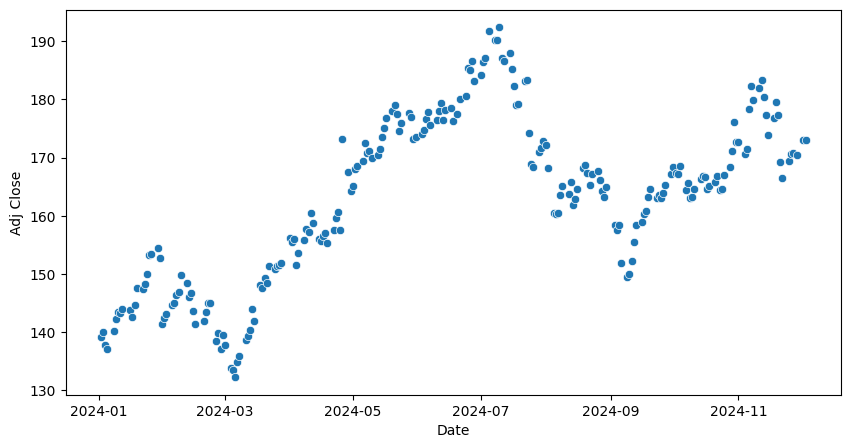

In [4]:
import matplotlib.pyplot as plt

from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Adj Close', )

What do we see? The price has risen somewhat, but it's been a bumpy ride. How much has the price changed over the period of interest?

In [5]:
df['Adj Close'].values[-1] / df['Adj Close'].values[0]

1.2427981198180846

The price has risen a little over 24% over the period of interest, but the price range has been substantially larger. What is it?

In [6]:
df['Adj Close'].max() / df['Adj Close'].min()

1.455033590967358

A dollar invested at the low for the year would have been worth $1.455 at the high for the year. Do what you will, capital is at risk.

Let's take a look at the relationship between price and volume.

<Axes: xlabel='Volume', ylabel='Adj Close'>

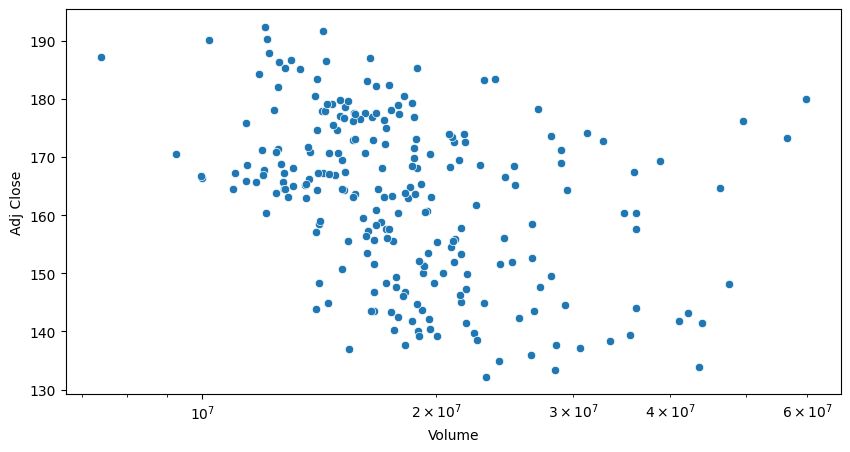

In [7]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
scatterplot(data=df, x='Volume', y='Adj Close')

If we plot the price against the log of the volume we mostly see a blob. That's what we see with data that is essentially uncorrelated. What do we see if we add a trendline?

<Axes: xlabel='Volume', ylabel='Adj Close'>

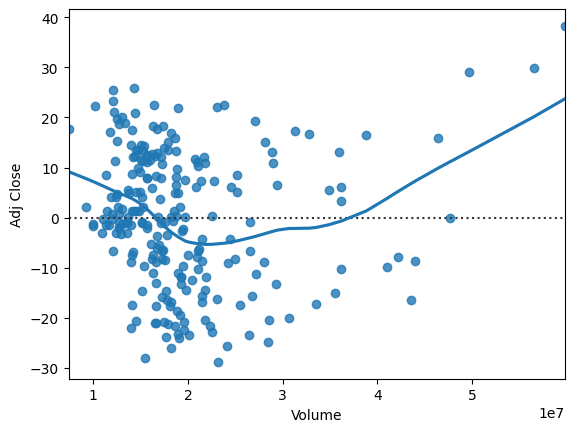

In [8]:
from seaborn import residplot

residplot(data=df, x='Volume', y='Adj Close', lowess=True)

That's an odd looking moving average. Its shape and direction are mostly governed by a few outliers.